In [28]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from threading import Timer
from Quarto import *
from keras_sequential_ascii import sequential_model_to_ascii_printout

In [48]:
r = requests.get('http://srv.lucatoma.eu/valsdav/losses.txt')

In [31]:
with open("losses_v1.txt") as file:
    text = file.read()

FileNotFoundError: [Errno 2] No such file or directory: 'losses_v1.txt'

Epochs: 368900
Selected: 368800
1) Mean: 4670.80933486
Std: 2078.37655906


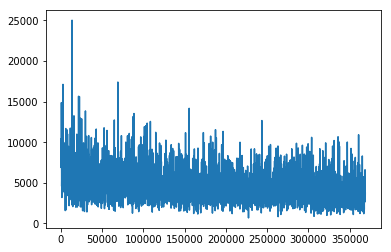

[ 4681.66894531  6249.52197266  5590.02294922  1973.7232666   2996.53222656
  4009.88085938  3193.25756836  4138.03710938  3256.09130859  4555.61230469
  3357.68383789  3079.38769531  1570.78857422  8303.2890625   2247.67114258
  2084.33203125  5608.6875      4333.37890625  5754.54101562  3599.97949219
  3459.65234375  4190.94970703  3902.79418945  4916.37792969  2966.14892578
  1398.51953125  4589.18457031  5694.15185547  1544.81274414  5018.41259766
  2331.91699219  1205.32958984  4063.89624023  5199.79394531  3167.66162109
  3856.06347656  3219.07226562  1727.28662109  3291.40844727  4650.75927734
  3230.22900391  2920.98046875  2806.82324219  3610.47802734  4054.50390625
  5882.33007812  6606.20996094  3190.72924805  2672.13134766  3722.61816406]


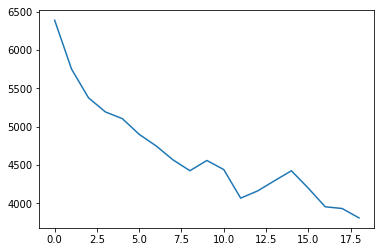

In [49]:
i = 100
data = np.array([float(x) for x in r.text.split("\n")[500:]])
print("Epochs: {}".format(len(data)*100))
print("Selected: {}".format((len(data)*100 - i)))
data1 = data[int(i*0.01)-1:]
index = list(range(i, (len(data)+1)*100,100))
plt.plot(index, data1)
print("1) Mean:",np.mean(data1))
print("Std:",np.std(data1))

plt.show()
print(data1[-50:])

interval = 200
m = []
for i in range(0, len(data1), interval):
    m.append(np.mean(data1[i:i+interval]))

plt.plot(range(len(m)),m)
plt.show()

Epochs: 39980
Selected: 39880
1) Mean: 4958937.45544
Std: 1656514.64861


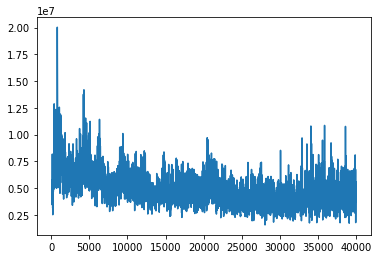

[ 4570876.5    3162809.75   4554814.     3239327.75   3030209.75   5876527.5
  3796818.     6659872.     6058727.5    5219846.     3143851.75   5045586.5
  3912966.25   6440138.     4223664.5    3982540.25   4060354.25   4375236.
  3769853.75   2843989.75   3959588.     4478910.     5385076.5    3625793.75
  6839644.5    4577460.5    3199293.     4984263.5    2689196.25
  4180857.75   4866410.5    5355304.5    4601567.5    6188096.5    2985549.
  3862629.75   8105772.5    6040424.     3675132.5    4615996.     5100323.5
  6758548.     6450932.5    1785288.125  3319921.     4645871.5    5593446.
  5291802.5    4339036.     4802726.5  ]


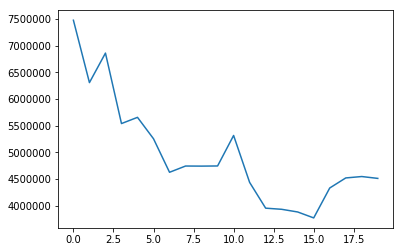

In [45]:
with open("output/losses.txt") as file:
    text = file.read()
i = 100
data = np.array([float(x) for x in text.split("\n")])
print("Epochs: {}".format(len(data)*10))
print("Selected: {}".format((len(data)*10 - i)))
data1 = data[int(i*0.1)-1:]
index = list(range(i, (len(data)+1)*10,10))
plt.plot(index, data1)
print("1) Mean:",np.mean(data1))
print("Std:",np.std(data1))

plt.show()
print(data1[-50:])

interval = 200
m = []
for i in range(0, len(data1), interval):
    m.append(np.mean(data1[i:i+interval]))

plt.plot(range(len(m)),m)
plt.show()

In [10]:
from keras import initializers
from keras.initializers import normal, identity
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import SGD , Adam
LEARNING_RATE = 1e-4

def build_model():
    print("Now we build the model")
    model = Sequential()
    model.add(Conv2D(32, (2,3), strides=(1, 1), input_shape=(4,16,4), name="conv1"))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (2,3), strides=(1, 1), name="conv2"))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(512, name="dense"))
    model.add(Activation('relu'))
    model.add(Dense(1, name="output"))
        
    adam = Adam(lr=LEARNING_RATE)
    model.compile(loss='mse',optimizer=adam)
    #plot_model(model,show_shapes=True, to_file='model.png')
    print("We finish building the model")
    return model



In [13]:
model = build_model()
model.load_weights("model.h5")
adam = Adam(lr=LEARNING_RATE)
model.compile(loss='mse',optimizer=adam)
print("Weights loaded!")

Now we build the model
We finish building the model
Weights loaded!


In [14]:
sequential_model_to_ascii_printout(model)
layers = model.layers

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####      4   16    4
              Conv2D    \|/  -------------------       800     0.1%
                relu   #####      3   14   32
              Conv2D    \|/  -------------------     12352     1.5%
                relu   #####      2   12   64
             Flatten   ||||| -------------------         0     0.0%
                       #####        1536
               Dense   XXXXX -------------------    786944    98.3%
                relu   #####         512
               Dense   XXXXX -------------------       513     0.1%
                       #####           1


Gameboard


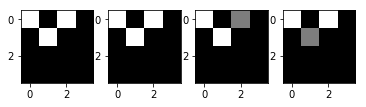

Spaces:  [(0, 1), (0, 3), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]
Item D, LeftItems: EFGHIJKLMNOP
Left items image


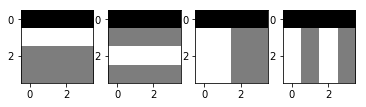

In [17]:
from Quarto import *
g = Gameboard()
g.apply_moves([((0,0),"A"), ((1,1),"B"),((0,2),"C")])
left = [l for l in"EFGHIJKLMNOP"]
s = Status(g, "D", left, left_items_image(left))
s.show()

In [21]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations



img = visualize_activation(model,3 , filter_indices=24, seed_input=actimg,verbose=True, tv_weight=0 , lp_norm_weight=0)



Iteration: 1, named_losses: <zip object at 0x7fe34b556dc8>, overall loss: -22.497243881225586
Iteration: 2, named_losses: <zip object at 0x7fe34b556f48>, overall loss: -29.042510986328125
Iteration: 3, named_losses: <zip object at 0x7fe34b556f88>, overall loss: -33.630126953125
Iteration: 4, named_losses: <zip object at 0x7fe34b556688>, overall loss: -37.23215103149414
Iteration: 5, named_losses: <zip object at 0x7fe34b556d88>, overall loss: -40.444271087646484
Iteration: 6, named_losses: <zip object at 0x7fe34b556688>, overall loss: -43.596954345703125
Iteration: 7, named_losses: <zip object at 0x7fe34b556fc8>, overall loss: -46.37220764160156
Iteration: 8, named_losses: <zip object at 0x7fe34b561108>, overall loss: -48.94406509399414
Iteration: 9, named_losses: <zip object at 0x7fe34b561148>, overall loss: -51.38579177856445
Iteration: 10, named_losses: <zip object at 0x7fe34b561188>, overall loss: -53.7602653503418
Iteration: 11, named_losses: <zip object at 0x7fe34b5611c8>, overall

Iteration: 91, named_losses: <zip object at 0x7fe34b561cc8>, overall loss: -181.46690368652344
Iteration: 92, named_losses: <zip object at 0x7fe3740b7888>, overall loss: -182.8280792236328
Iteration: 93, named_losses: <zip object at 0x7fe34b556ec8>, overall loss: -184.2147979736328
Iteration: 94, named_losses: <zip object at 0x7fe34b5569c8>, overall loss: -185.60032653808594
Iteration: 95, named_losses: <zip object at 0x7fe3740b7888>, overall loss: -186.9736328125
Iteration: 96, named_losses: <zip object at 0x7fe34b556ec8>, overall loss: -188.3900146484375
Iteration: 97, named_losses: <zip object at 0x7fe34b5569c8>, overall loss: -189.7748565673828
Iteration: 98, named_losses: <zip object at 0x7fe3740b7888>, overall loss: -191.1836395263672
Iteration: 99, named_losses: <zip object at 0x7fe34b556ec8>, overall loss: -192.56358337402344
Iteration: 100, named_losses: <zip object at 0x7fe34b5569c8>, overall loss: -193.9563751220703
Iteration: 101, named_losses: <zip object at 0x7fe3740b7888

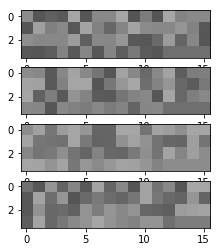

In [22]:
show_action_image(img)

In [2]:
from Quarto import *


Using TensorFlow backend.


In [23]:
replay_memory = Experience(10, 4, 0.5)

In [24]:
replay_memory.add((1),20)
replay_memory.add((2),100)
replay_memory.add((3),30)
replay_memory.add((4),3000)
replay_memory.add((5),1000)

In [25]:
replay_memory.select(0.4)

([5, 4, 2, 3],
 array([ 0.49593442,  0.39810717,  0.78600309,  1.        ]),
 [4, 3, 1, 2])

In [26]:
replay_memory.tree.print_tree()

22.99900223131502 
22.99900223131502 0 
17.37558897941153 5.623413251903491 0 0 
7.63441361516796 9.74117536424357 5.623413251903491 0 0 0 0 0 
4.47213595499958 3.1622776601683795 2.340347319320716 7.400828044922853 5.623413251903491 0 0 0 0 0 0 0 0 0 0 0 
